# G4Bench benchmark results
Geant4 : v11.3.0 Single Thread Performance

- AMD Ryzen Threadripper PRO 7985WX (3.2GHz / 5.1GHz) 64 cores x 1 SMT : Ubuntu 24.04LTS
- AMD EPYC 9534 (2.45GHz / 3.55GHz) 64 cores x 1 SMT : RedHat EL 9.5
- AMD EPYC 7643 (2.3GHz / 3.6GHz) 48 cores x 2 SMT : AlmaLinux 9.5
- Intel Xeon Gold 6430 (2.1GHz / 3.4GHz) 24cores x 2 HT : RedHat EL 9.5
- AMD Ryzen Threadripper PRO 5995WX (2.7GHz / 4.5GHz) 64 cores x 1 SMT : Ubuntu 24.04LTS
- Intel Xeon Gold 6336Y (2.4GHz / 3.6GHz) 24cores x 2 HT : AlmaLinux 9.5
- AMD Ryzen 9 7950X (4.5GHz / 5.7GHz) 16 cores x 1 SMT : Ubuntu 22.04LTS

In [36]:
import pandas
import json
import os

In [37]:
data_dir = "./data/11.3.0/"
cpu_list = os.listdir(data_dir)
cpu_list

['ryzen_trpro_7985wx',
 'epyc_9534',
 'ryzen_7950x',
 'xeon_6430',
 'ryzen_trpro_5995wx',
 'xeon_6336y',
 'epyc_7643']

In [38]:
def make_df(data_dir, data_header):
    df_cpu = pandas.DataFrame(columns = ['name', 'date', 'cpu', 'g4version', 'thread', 'event', 'time', 'init', 'tpe', 'eps', 'sps', 'edep'])
    cpu_list = os.listdir(data_dir)
    for cpu in cpu_list:
        df = pandas.read_json(data_dir + "/" + cpu + "/" + data_header + ".json")
        df_cpu = pandas.concat([df_cpu, df[df['thread']==1]], axis=0)

    df_sorted = df_cpu.sort_values('sps')
    df_sorted.reset_index(drop=True, inplace=True)
    return df_sorted

## ECAL e- 1GeV shower simulation

In [43]:
df_ecal = make_df("data/11.3.0/", "ecal_e1000")
df_ecal

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,ecal_e1000,2025-01-21 00:49:24,AMD EPYC 7643 48-Core Processor,1130,1,20000,91.3161,0.012682,4.56580,0.219050,954.414,967.684
1,ecal_e1000,2025-01-21 00:51:26,Intel(R) Xeon(R) Gold 6336Y CPU @ 2.40GHz,1130,1,20000,89.8117,0.008057,4.49059,0.222708,970.353,967.684
2,ecal_e1000,2025-01-21 00:43:00,AMD EPYC 9534 64-Core Processor,1130,1,20000,80.0368,0.007103,4.00184,0.249907,1088.860,967.684
3,ecal_e1000,2025-01-21 00:50:46,AMD Ryzen Threadripper PRO 5995WX 64-Cores,1130,1,20000,72.2896,0.007499,3.61448,0.276694,1205.570,967.684
4,ecal_e1000,2025-01-21 00:49:13,Intel(R) Xeon(R) Gold 6438Y+,1130,1,20000,65.2007,0.006704,3.26004,0.306777,1336.640,967.684
5,ecal_e1000,2025-01-21 00:42:46,AMD Ryzen Threadripper PRO 7985WX 64-Cores,1130,1,20000,57.1013,0.005188,2.85506,0.350287,1526.220,967.684
6,ecal_e1000,2025-01-21 01:21:27,AMD Ryzen 9 7950X 16-Core Processor,1130,1,20000,55.6031,0.005431,2.78016,0.359727,1567.350,967.684


In [44]:
import matplotlib.pyplot as plt

In [45]:
def plot_sps(df, title="Benchmark", color="C0"):
    plt.rcdefaults()
    fig, cpu_plot = plt.subplots(figsize=(12,6))
    cpu_plot.barh(df['cpu'], df['sps'], align='center', color=color)
    cpu_plot.set_title(title)
    cpu_plot.set_xlabel('SPS (Steps/Second)')
    nplots = len(df)
    for iy in range(0,nplots) :
        xpos = df['sps'][iy] * 0.6
        plt.text(xpos, iy, df['sps'][iy], verticalalignment='center', color='white')
    plt.show()

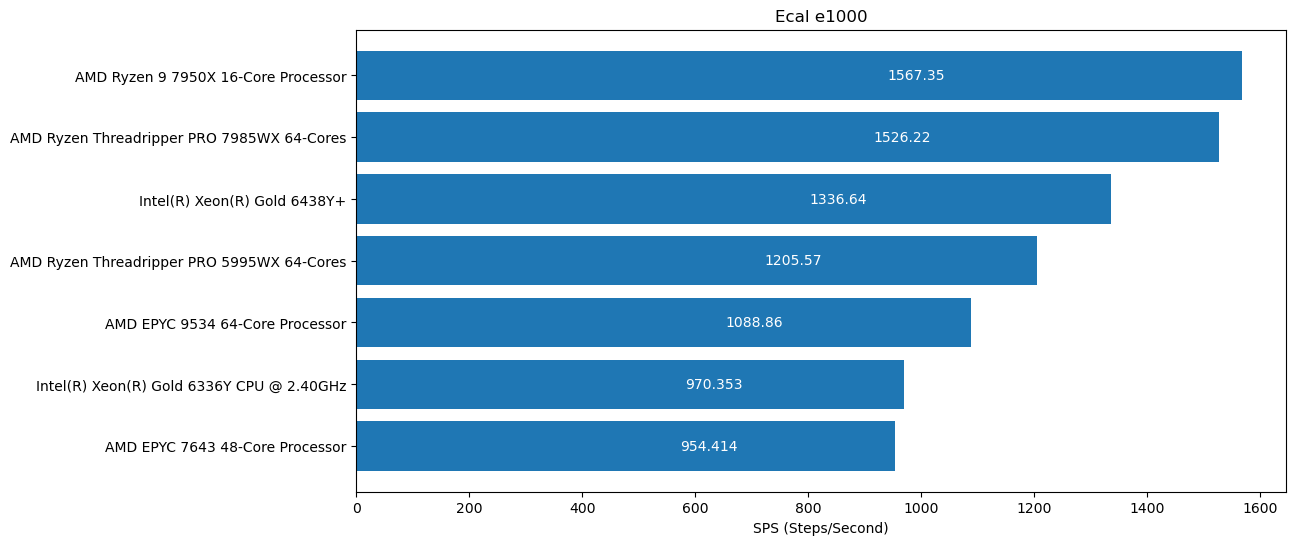

In [46]:
plot_sps(df_ecal, "Ecal e1000")

## HCAL proton 10GeV hadron shower simulation

In [47]:
df_hcal = make_df("data/11.3.0/", "hcal_p10")
df_hcal

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,hcal_p10,2025-01-21 01:23:06,AMD EPYC 7643 48-Core Processor,1130,1,4000,124.0230,0.003373,31.0057,0.032253,503.192,850.952
1,hcal_p10,2025-01-21 01:15:22,Intel(R) Xeon(R) Gold 6336Y CPU @ 2.40GHz,1130,1,4000,114.1850,0.001527,28.5462,0.035031,546.539,850.952
2,hcal_p10,2025-01-21 01:04:51,AMD EPYC 9534 64-Core Processor,1130,1,4000,106.2610,0.001407,26.5652,0.037644,587.294,850.952
3,hcal_p10,2025-01-21 01:15:26,AMD Ryzen Threadripper PRO 5995WX 64-Cores,1130,1,4000,99.2894,0.001460,24.8224,0.040287,628.409,850.947
4,hcal_p10,2025-01-21 01:10:48,Intel(R) Xeon(R) Gold 6438Y+,1130,1,4000,80.9513,0.001194,20.2378,0.049413,770.913,850.952
5,hcal_p10,2025-01-21 01:01:17,AMD Ryzen Threadripper PRO 7985WX 64-Cores,1130,1,4000,77.6019,0.001150,19.4005,0.051546,804.032,850.947
6,hcal_p10,2025-01-21 01:31:37,AMD Ryzen 9 7950X 16-Core Processor,1130,1,4000,73.5783,0.001110,18.3946,0.054365,848.164,850.952


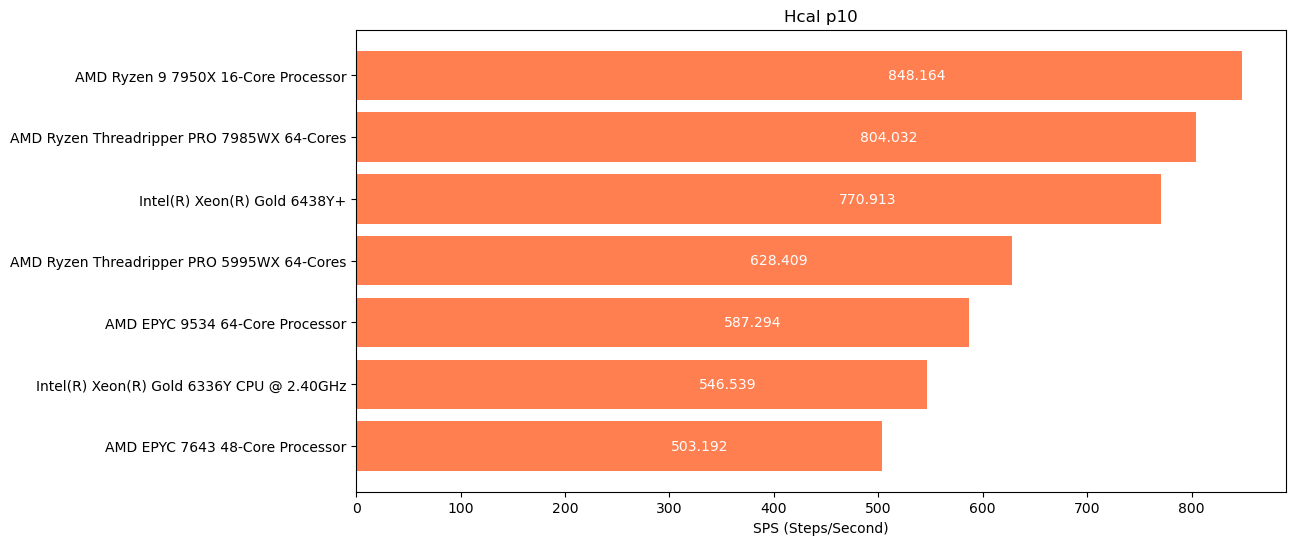

In [48]:
plot_sps(df_hcal, "Hcal p10", color="coral")

## VGEO X-ray 18MV water phantom simulation

In [49]:
df_vgeo = make_df("data/11.3.0/", "vgeo_x18")
df_vgeo

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,vgeo_x18,2025-01-21 01:43:17,Intel(R) Xeon(R) Gold 6336Y CPU @ 2.40GHz,1130,1,500000,80.1319,0.001377,0.160264,6.23982,1288.18,1.9036
1,vgeo_x18,2025-01-21 02:02:56,AMD EPYC 7643 48-Core Processor,1130,1,500000,79.9213,0.003812,0.159843,6.25645,1291.62,1.9036
2,vgeo_x18,2025-01-21 01:31:31,AMD EPYC 9534 64-Core Processor,1130,1,500000,70.9916,0.001559,0.141983,7.04324,1454.05,1.9036
3,vgeo_x18,2025-01-21 01:46:53,AMD Ryzen Threadripper PRO 5995WX 64-Cores,1130,1,500000,65.8923,0.002468,0.131785,7.58842,1566.60,1.9036
4,vgeo_x18,2025-01-21 01:35:58,Intel(R) Xeon(R) Gold 6438Y+,1130,1,500000,56.4909,0.001364,0.112982,8.85119,1827.29,1.9036
5,vgeo_x18,2025-01-21 01:23:23,AMD Ryzen Threadripper PRO 7985WX 64-Cores,1130,1,500000,52.9654,0.001469,0.105931,9.44039,1948.93,1.9036
6,vgeo_x18,2025-01-21 01:43:42,AMD Ryzen 9 7950X 16-Core Processor,1130,1,500000,51.2323,0.001070,0.102465,9.75967,2014.84,1.9036


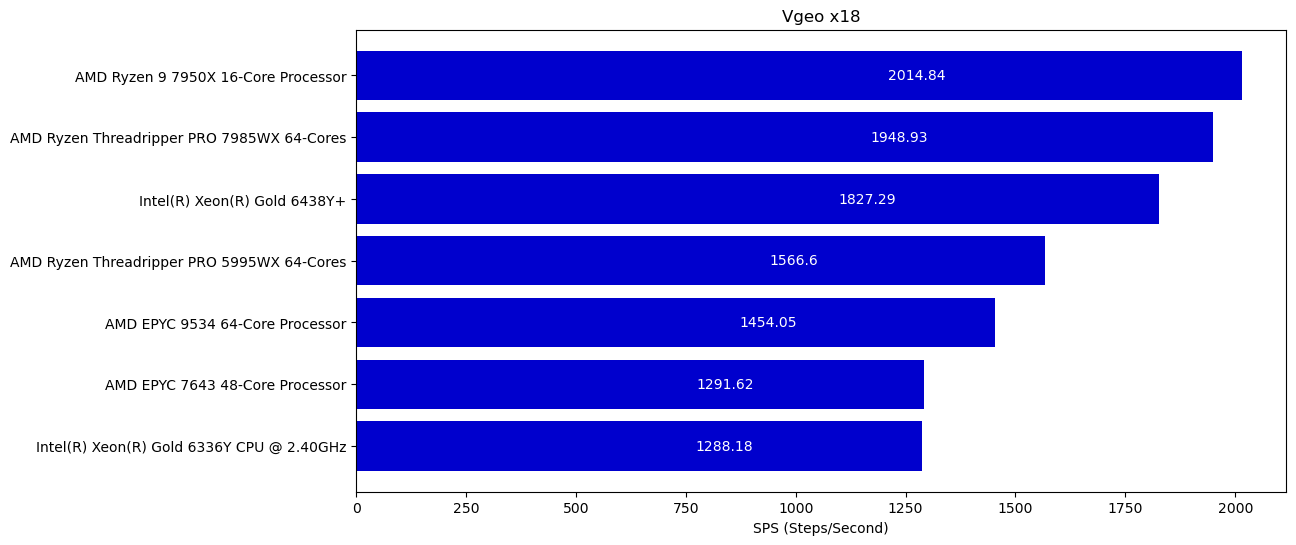

In [50]:
plot_sps(df_vgeo, "Vgeo x18", color="mediumblue")